# Segmenting and Clustering Neighborhoods in Toronto

Student: Emma Delehanty

## Introduction

In this project I explore, segment, and cluster the neighborhoods in the city of Toronto. The neighborhood data though is not readily available on the internet.

For the Toronto neighborhood data, a Wikipedia page: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M exists that has all the information we need to explore and cluster the neighborhoods in Toronto. We will have to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format.

Once the data is in a structured format, we can start the analysis to explore and cluster the neighborhoods in the city of Toronto.

We build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe.

The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood. We only process the cells that have an assigned borough. We ignore cells with a borough that is Not assigned. More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma. If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

There are different website scraping libraries and packages in Python. One of the most common packages is BeautifulSoup and we will use it in this project. Package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

Before we get the data and start exploring it, let's download all the dependencies that we will need.


### Import important libraries

In [13]:
!pip install beautifulsoup4

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\Users\ed2489\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [14]:
!pip install lxml

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\Users\ed2489\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
### Import important libraries
from bs4 import BeautifulSoup
import requests   # library to handle requests
import lxml       # parse the website in lxml format
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize

print('Libraries imported.')
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Libraries imported.


In [2]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('table', class_='wikitable sortable')

In [3]:
from IPython.display import display_html
url = str(soup.table)
display_html(url,raw=True)

Postal Code,Borough,Neighborhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [4]:
df = pd.read_html(url,header=0)[0]
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
Postal Code     180 non-null object
Borough         180 non-null object
Neighborhood    180 non-null object
dtypes: object(3)
memory usage: 4.3+ KB


### Data preprocessing and cleaning

In [6]:
# filtering not assigned borough
df1 = df[df.Borough != 'Not assigned']
# Combining the neighbourhoods with same Postalcode
df2 = df1.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)
df2.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [7]:
# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2['Neighborhood'] = np.where(df2['Neighborhood'] == 'Not assigned',df2['Borough'], df2['Neighborhood'])

df2.shape

(103, 3)

# Q2

### create the latitudes and longitudes for various neighbourhoods in Canada


In [8]:
df_loc = pd.read_csv('https://cocl.us/Geospatial_data')
df_loc.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
df_toronto = pd.merge(df2, df_loc, on = 'Postal Code')
df_toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [10]:
df_toronto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 5 columns):
Postal Code     103 non-null object
Borough         103 non-null object
Neighborhood    103 non-null object
Latitude        103 non-null float64
Longitude       103 non-null float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


# Q3

## Explore and cluster the neighborhoods in Toronto(EDA)

In [11]:
# The below is an overlay of the provided points to a map of the region in Finland, showing how well they align to areas
# on the map where they are expected. 
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected = True)
figure = px.scatter_mapbox(df_toronto, lat="Latitude", lon="Longitude")
figure.update_layout(mapbox_style="open-street-map")
figure.show()

In [12]:
## using folium
import folium  
from IPython.display import HTML, display
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=8)

for lat,lng,borough,neighborhood in zip(df_toronto['Latitude'],df_toronto['Longitude'],df_toronto['Borough'],df_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

# Using KNN(USING DISTANCE)

**Import KNeighborsClassifier from scikit learn.**

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.cluster import KMeans
k=5
toronto_clustering = df_toronto.drop(['Postal Code','Borough','Neighborhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(toronto_clustering)
kmeans.labels_

array([4, 4, 2, 3, 2, 1, 0, 4, 4, 2, 3, 1, 0, 4, 4, 2, 2, 1, 0, 4, 2, 2,
       0, 4, 2, 2, 0, 3, 3, 4, 2, 2, 0, 3, 3, 4, 2, 2, 0, 3, 3, 4, 2, 2,
       4, 3, 1, 4, 2, 1, 1, 0, 3, 1, 4, 3, 1, 1, 4, 3, 1, 3, 3, 1, 1, 0,
       3, 3, 2, 1, 1, 0, 3, 3, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 4, 1, 1])

In [15]:
df_toronto.insert(0, 'Cluster', kmeans.labels_)
df_toronto.head()

,Cluster,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,4,M3A,North York,Parkwoods,43.753259,-79.329656
1,4,M4A,North York,Victoria Village,43.725882,-79.315572
2,2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,2,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [16]:
df_toronto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 6 columns):
Cluster         103 non-null int32
Postal Code     103 non-null object
Borough         103 non-null object
Neighborhood    103 non-null object
Latitude        103 non-null float64
Longitude       103 non-null float64
dtypes: float64(2), int32(1), object(3)
memory usage: 5.2+ KB


In [17]:
# create map

map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=8)


# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat,lon,borough,neighborhood,cluster in zip(df_toronto['Latitude'],df_toronto['Longitude'],
                                                df_toronto['Borough'],df_toronto['Neighborhood'],
                                                df_toronto['Cluster']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_toronto)
       
map_toronto

#### this is  result of map clustering of Neighborhoods in Toronto using KNN basing on distance 

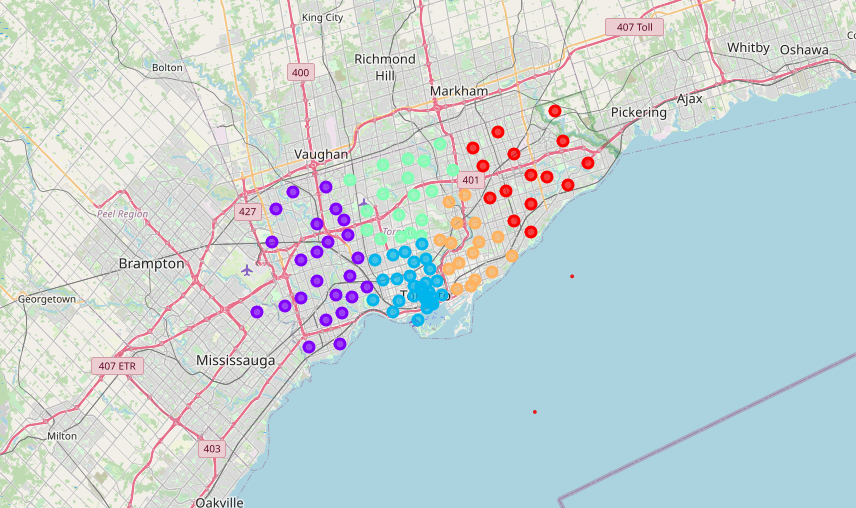

### Next we using Foursquare API to look for each neighborhood 

In [18]:
CLIENT_ID = 'JBREGZ4UNA53HX43WMAD4TQ2X2XJWMX5DPHEZEIZHQA0ACNP' # your Foursquare ID
CLIENT_SECRET = 'VNS40KF3V4MGSWWAV0IGQINZIGIT1EQKNCWBFPOS3QF1JMOJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: JBREGZ4UNA53HX43WMAD4TQ2X2XJWMX5DPHEZEIZHQA0ACNP
CLIENT_SECRET:VNS40KF3V4MGSWWAV0IGQINZIGIT1EQKNCWBFPOS3QF1JMOJ


In [19]:
VERSION = '20180605' # Foursquare API version

neighborhood_name = df_toronto.loc[0, 'Neighborhood'] # neighborhood name
neighborhood_latitude = df_toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

radius = 500 # define radius
LIMIT = 100 # limit of number of venues returned by Foursquare API
url = 'https://api.foursquare.com/v2/venues/explore?&client_id=JGGBRN5XODTLZGJOMCSWIQMRH1JLGJKPSFR10XNB2R5U25GR&client_secret=KWRAMLK2HOJBQ2XLICLKXRU3M4HOCC1U2VG4Y4OPP5JF03QX&v=20180605&ll=43.67635739999999,-79.2930312&radius=500&limit=100'

results = requests.get(url).json()

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


In [20]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
# type your answer here

toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [24]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Sun Life,43.754760,-79.332783,Construction & Landscaping
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [25]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",9,9,9,9,9,9
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
Berczy Park,55,55,55,55,55,55
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16


In [26]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000,0.000000
1,"Alderwood, Long Branch",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000,0.000000
3,Bayview Village,0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000,0.000000
4,"Bedford Park, Lawrence Manor East",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000,0.043478
5,Berczy Park,0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00,0.018182,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000,0.000000
6,"Birch Cliff, Cliffside West",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000,0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000,0.000000
8,"Business reply mail Processing Centre, South C...",0.062500,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,...,0.00,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000,0.000000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0,0.000000,0.0625,0.0625,0.0625,0.125,0.1875,0.125,...,0.00,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.0,0.000000,0.000000


In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Lounge,Breakfast Spot,Latin American Restaurant,Women's Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Gym,Pharmacy,Athletics & Sports,Sandwich Place,Pub,Pool,Discount Store,Dessert Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Fried Chicken Joint,Shopping Mall,Bridal Shop,Sandwich Place,Diner,Restaurant,Deli / Bodega,Supermarket
3,Bayview Village,Café,Japanese Restaurant,Bank,Chinese Restaurant,Women's Store,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Restaurant,Sandwich Place,Sushi Restaurant,Indian Restaurant,Juice Bar,Liquor Store,Comfort Food Restaurant,Grocery Store


### Cluster Neighborhoods basing on venue categories 

In [30]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [31]:
df_last=df_toronto[['Postal Code' ,'Borough', 'Neighborhood', 'Latitude', 'Longitude']]

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_last

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



# check the last columns!
toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,4.0,Food & Drink Shop,Park,Construction & Landscaping,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
1,M4A,North York,Victoria Village,43.725882,-79.315572,3.0,Portuguese Restaurant,Coffee Shop,French Restaurant,Hockey Arena,Intersection,Pizza Place,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3.0,Coffee Shop,Park,Pub,Bakery,Theater,Breakfast Spot,Café,Health Food Store,Spa,Shoe Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.0,Clothing Store,Furniture / Home Store,Accessories Store,Vietnamese Restaurant,Boutique,Athletics & Sports,Coffee Shop,Carpet Store,Event Space,Miscellaneous Shop
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,3.0,Coffee Shop,Sushi Restaurant,Yoga Studio,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,College Auditorium


In [33]:
toronto_merged1=toronto_merged.fillna(0)

In [40]:
toronto_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 16 columns):
Postal Code               103 non-null object
Borough                   103 non-null object
Neighborhood              103 non-null object
Latitude                  103 non-null float64
Longitude                 103 non-null float64
Cluster Labels            103 non-null float64
1st Most Common Venue     103 non-null object
2nd Most Common Venue     103 non-null object
3rd Most Common Venue     103 non-null object
4th Most Common Venue     103 non-null object
5th Most Common Venue     103 non-null object
6th Most Common Venue     103 non-null object
7th Most Common Venue     103 non-null object
8th Most Common Venue     103 non-null object
9th Most Common Venue     103 non-null object
10th Most Common Venue    103 non-null object
dtypes: float64(3), object(13)
memory usage: 18.7+ KB


In [41]:
# create map

map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=8)


# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat,lon,borough,neighborhood,cluster in zip(toronto_merged1['Latitude'],toronto_merged1['Longitude'],
                                                toronto_merged1['Borough'],toronto_merged1['Neighborhood'],
                                                toronto_merged1['Cluster Labels']):
    label = folium.Popup('Cluster Labels' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_toronto)
       
map_toronto

## This is the final cluster map after we using venue categories that distinguish each cluster

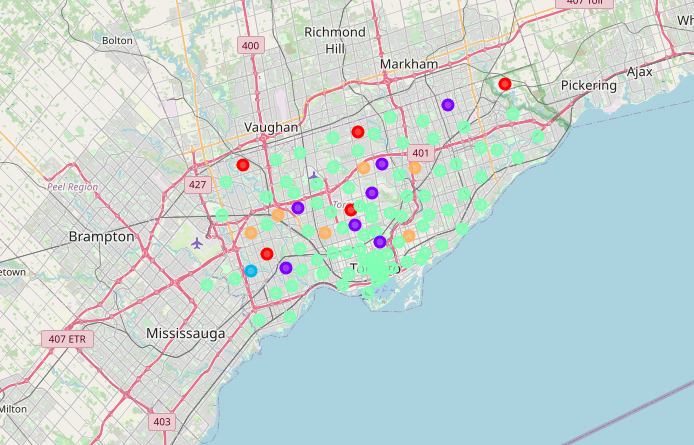